In [32]:
import numpy as np
max_wav = 1556.5               # in nm
min_wav = 1555.5               # in nm
step    = 1                  # in GHz   
c = 299792458.0

min_frq = c/max_wav * 0.001
max_frq = c/min_wav * 0.001
flag = True 
freq = []
i = min_frq                  # in THz
while flag:
    freq.append(i)
    i = i + 0.025             
    if (i>max_frq): break

# The input to laser is in two parts - THz and GHz
fghz = []
fthz = []
for i in range (len(freq)):
    fghz.append(freq[i]%int(freq[i]) * 10000)
    fthz.append(int(freq[i]))

In [30]:
freq

[192.66867480719793,
 192.69367480719794,
 192.71867480719794,
 192.74367480719795,
 192.76867480719795,
 192.79367480719796,
 192.81867480719797,
 192.84367480719797,
 192.86867480719798,
 192.89367480719798]

In [33]:
freq

[192.6067831673627,
 192.6317831673627,
 192.6567831673627,
 192.6817831673627,
 192.70678316736272]

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Read
df_full = pd.read_csv("adc_readings_mrr.csv",header=None)
l = len(df_full)
avg = []
freq = []
for i in range(1,l+1,100):
    avg.append(np.average(float(df_full.iloc[i:i+99,2])))
    freq.append(df_full.iloc[i,1])

time = np.array(np.arange(0,len(avg),1))

plt.plot(freq,avg)
plt.show()

TypeError: cannot convert the series to <class 'float'>

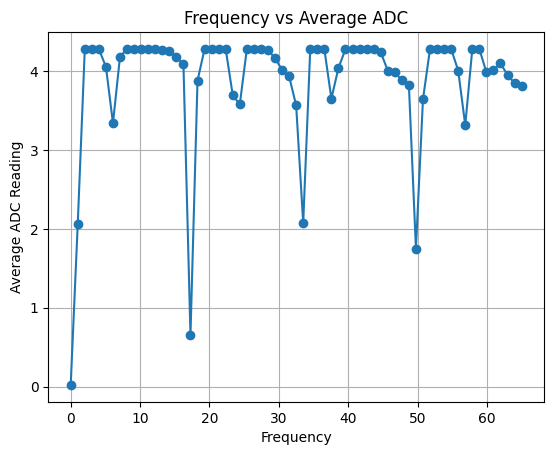

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Read CSV (no header, so treat all as raw data first)
df_full = pd.read_csv("adc_readings_mrr.csv", header=None)

# Ensure numeric conversion (coerce errors to NaN)
df_full = df_full.apply(pd.to_numeric)


l = len(df_full)
avg = []
freq = []

# Take averages of every 100 values in column 2
for i in range(0, l+1, 100):
    block = df_full.iloc[i:i+100, 2]   # 100 values from column 2
    if len(block) == 100:              # only take full chunks
        avg.append(block.mean())
        freq.append(df_full.iloc[i, 1])   # frequency from column 1

# Convert to numpy for plotting
avg = np.array(avg)
freq = np.array(freq)
x = np.linspace(0,65,65)
# Plot
plt.plot(x, avg, marker="o")
plt.xlabel("Frequency")
plt.ylabel("Average ADC Reading")
plt.title("Frequency vs Average ADC")
plt.grid(True)
plt.show()


In [24]:
len(avg)

65

In [19]:
freq

array([53536, 54536, 55536, 56536, 57536, 58536, 59536, 62536,  1000,
        4000,  7000, 10000, 53536, 54536, 55536, 56536, 57536, 58536,
       62536,     0,  3000,  6000, 10000, 53536, 54536, 55536, 56536,
       57536, 58536, 61536, 64536,  2000,  6000,  9000, 12000, 53536,
       54536, 55536, 56536, 57536, 60536, 63536,  1000,  5000,  8000,
       11000, 53536, 54536, 55536, 56536, 57536, 59536, 62536,  1000,
        4000,  7000])

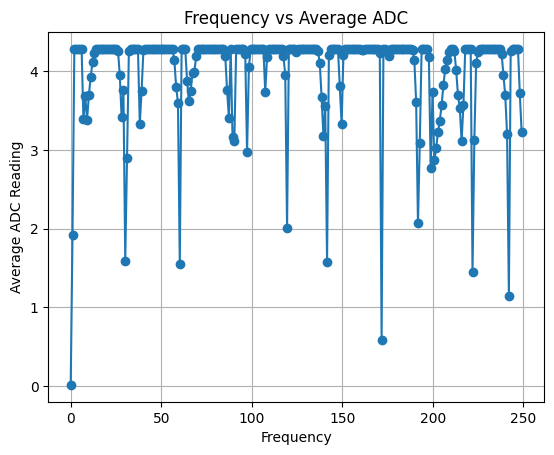

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Read CSV (no header, so treat all as raw data first)
df_full = pd.read_csv("adc_readings_mrr_2.csv", header=None)

# Ensure numeric conversion (coerce errors to NaN)
df_full = df_full.apply(pd.to_numeric)


l = len(df_full)
avg = []
freq = []

# Take averages of every 100 values in column 2
for i in range(0, l+1, 100):
    block = df_full.iloc[i:i+100, 2]   # 100 values from column 2
    if len(block) == 100:              # only take full chunks
        avg.append(block.mean())
        freq.append(df_full.iloc[i, 1])   # frequency from column 1

# Convert to numpy for plotting
avg = np.array(avg)
freq = np.array(freq)
x = np.linspace(0,249,249)
# Plot
plt.plot(x, avg, marker="o")
plt.xlabel("Frequency")
plt.ylabel("Average ADC Reading")
plt.title("Frequency vs Average ADC")
plt.grid(True)
plt.show()


In [37]:
df_full.to_csv("adc_readings_mrr_10pm.csv", index=False)

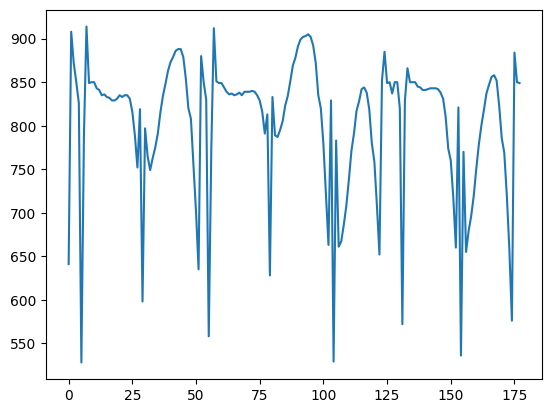

In [36]:
# power fluctuation

pow =  [641, 908, 872, 850, 826, 528, 788, 914, 849, 850, 850, 843, 841, 835, 836, 833, 832, 829, 829, 831, 835, 833, 835, 835, 831, 816, 789, 752, 819, 598, 797, 765, 749, 763, 775, 791, 815, 834, 848, 863, 873, 879, 886, 888, 888, 879, 854, 820, 808, 754, 701, 635, 880, 850, 830, 558, 773, 912, 851, 849, 849, 844, 839, 836, 837, 835, 836, 838, 835, 839, 839, 839, 840, 839, 835, 829, 816, 791, 813, 628, 833, 789, 787, 795, 805, 823, 834, 851, 869, 878, 891, 899, 902, 903, 905, 902, 892, 872, 835, 820, 779, 721, 663, 829, 529, 783, 661, 667, 686, 708, 738, 771, 791, 817, 828, 842, 844, 838, 819, 780, 759, 709, 652, 852, 885, 849, 850, 837, 850, 850, 820, 572, 829, 866, 850, 850, 850, 845, 844, 841, 841, 842, 843, 843, 843, 842, 838, 831, 810, 774, 760, 717, 660, 821, 536, 770, 655, 679, 696, 719, 750, 778, 800, 818, 837, 847, 856, 858, 852, 823, 786, 769, 720, 658, 576, 884, 850, 849]
plt.plot(pow)

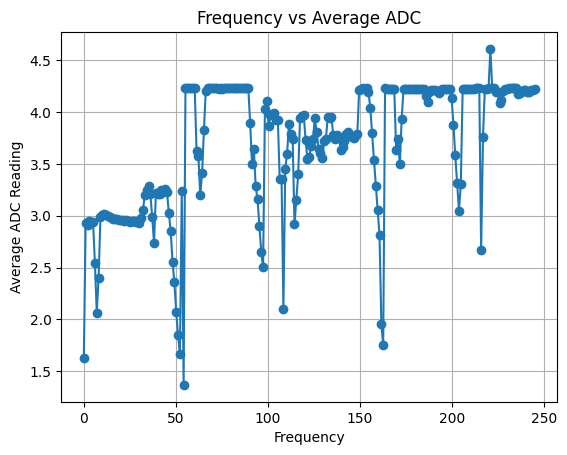

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Read CSV (no header, so treat all as raw data first)
df_full = pd.read_csv("adc_readings_mrr_2.csv", header=None)

# Ensure numeric conversion (coerce errors to NaN)
df_full = df_full.apply(pd.to_numeric)


l = len(df_full)
avg = []
freq = []

# Take averages of every 100 values in column 2
for i in range(0, l+1, 100):
    block = df_full.iloc[i:i+100, 2]   # 100 values from column 2
    if len(block) == 100:              # only take full chunks
        avg.append(block.mean())
        freq.append(df_full.iloc[i, 1])   # frequency from column 1

# Convert to numpy for plotting
avg = np.array(avg)
freq = np.array(freq)
x = np.linspace(0,245,245)
# Plot
plt.plot(x, avg, marker="o")
plt.xlabel("Frequency")
plt.ylabel("Average ADC Reading")
plt.title("Frequency vs Average ADC")
plt.grid(True)
plt.show()


5pm 1st plot

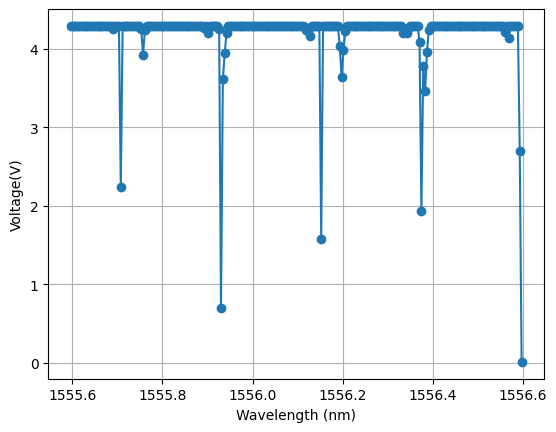

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Read CSV (no header, so treat all as raw data first)
df_full = pd.read_csv("adc_readings_mrr_5pm2.csv", header=None)

df = df_full.iloc[:,:3]
# Ensure numeric conversion (coerce errors to NaN)
df_full = df.apply(pd.to_numeric)


l = len(df_full)
avg = []
freq = []

# Take averages of every 100 values in column 2
for i in range(0, l+1, 100):
    block = df_full.iloc[i:i+100, 2]   # 100 values from column 2
    if len(block) == 100:              # only take full chunks
        avg.append(block.mean())
        freq.append(df_full.iloc[i, 1])   # frequency from column 1

c = 299792458.0
max_wa = c/192.5947*0.001
min_wa = c/192.7187*0.001

wav = np.linspace(min_wa,max_wa,244)
avg = avg[::-1]

# Convert to numpy for plotting
avg = np.array(avg)
freq = np.array(freq[:243])
wav = np.array(wav)
x = np.linspace(0,244,244)
# Plot
plt.plot(wav, avg, marker="o")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Voltage(V)")
plt.grid(True)
plt.show()


In [ ]:
#reverse avg array


In [7]:
import numpy as np
c = 299792458.0
max_wa = c/192.5947*0.001
min_wa = c/192.7187*0.001

wav = np.linspace(min_wa,max_wa,244)
avg = avg[:-1]

NameError: name 'avg' is not defined

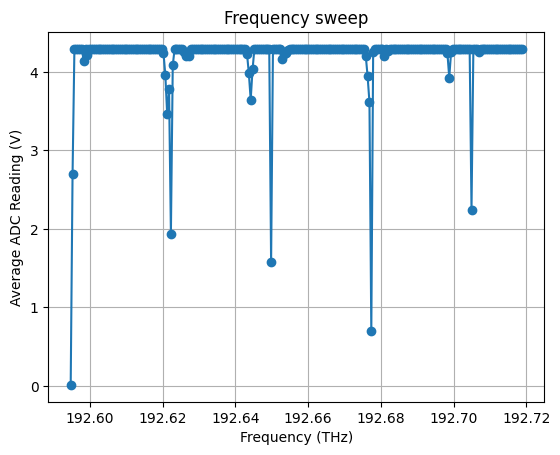

In [56]:
freq = np.linspace(192.5947,192.7187,244)
 
# Plot
plt.plot(freq, avg, marker="o")
plt.xlabel("Frequency (THz)")
plt.ylabel("Average ADC Reading (V)")
plt.title("Frequency sweep")
plt.grid(True)
plt.show()


In [10]:
len(avg)

243